# Template Matching using Python and OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(599, 900, 3)


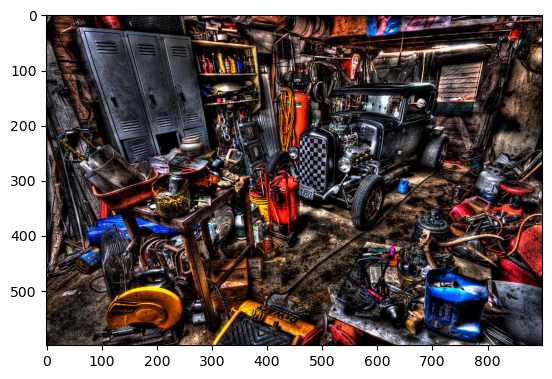

In [7]:
# Reading the full image
full_img = cv2.imread('./images/mechanics-garage-kyle-simpson.jpg')
full_img = cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)

print(full_img.shape)

plt.imshow(full_img)

#cv2.imshow('full image', full_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

(61, 81, 3)


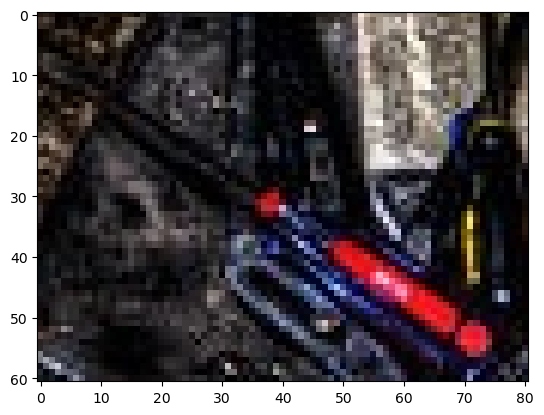

In [8]:
#Reading the template we want to match with the full image - in this case, a screwdriver
screwdriver = cv2.imread('./images/screwdriver.jpg')
screwdriver = cv2.cvtColor(screwdriver, cv2.COLOR_BGR2RGB)

print(screwdriver.shape)

height, width,channels = screwdriver.shape

plt.imshow(screwdriver)

#cv2.imshow('screwdriver', screwdriver)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [36]:
# All the 6 methods for comparison in a list
# At first, I'll be using strings, but later on the eval() function will be used in order to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

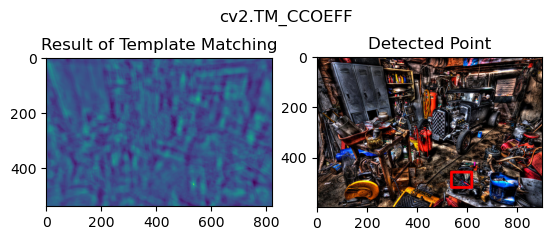

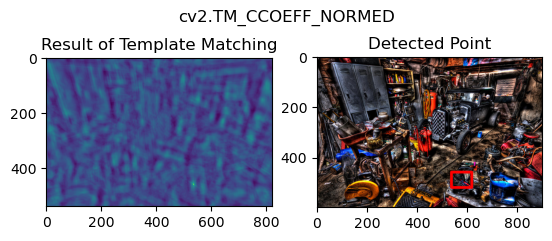

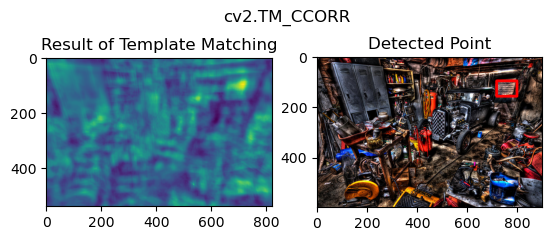

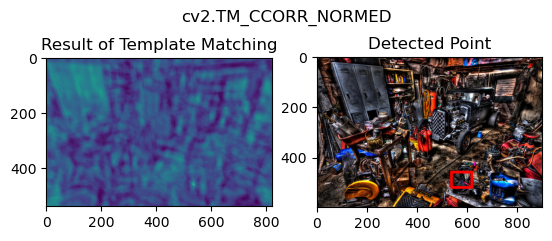

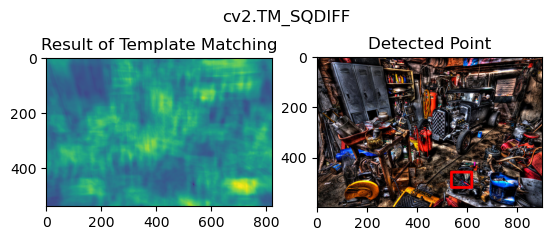

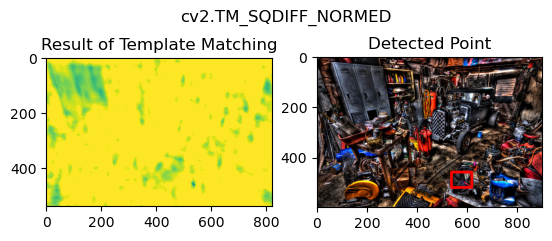

<Figure size 640x480 with 0 Axes>

In [10]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full_img.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,screwdriver,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    
    plt.suptitle(m, y=0.75)
    
    plt.show()
    plt.savefig(m + 'method.png')

(474, 636, 3)


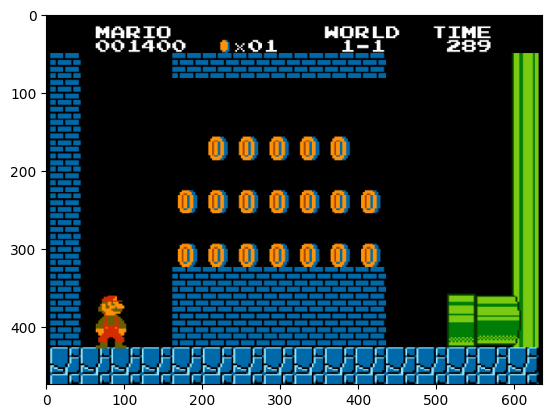

In [33]:
mario = cv2.imread('./images/super-mario.png')
mario = cv2.cvtColor(mario, cv2.COLOR_BGR2RGB)

print(mario.shape)
plt.imshow(mario)

(30, 25, 3)


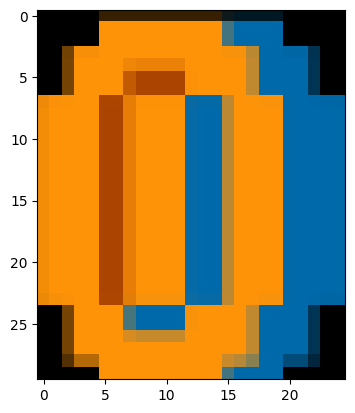

In [35]:
coin = cv2.imread('./images/coin.png')
coin = cv2.cvtColor(coin, cv2.COLOR_BGR2RGB)

print(coin.shape)

height, width,channels = coin.shape

plt.imshow(coin)

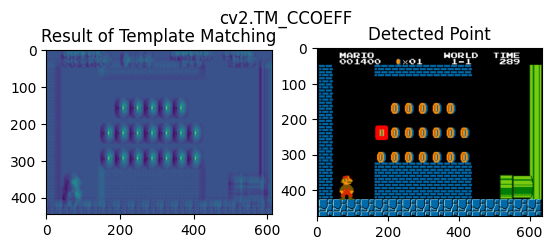

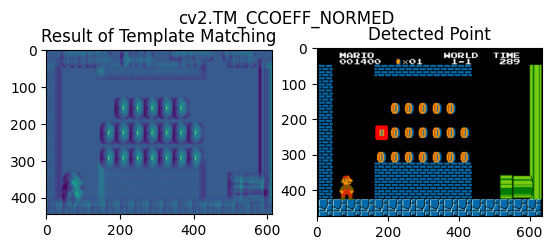

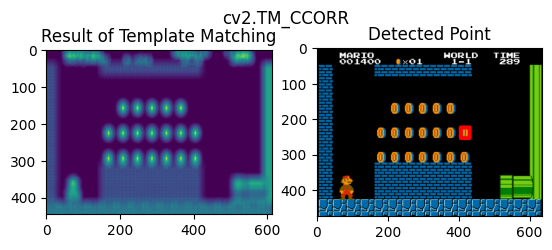

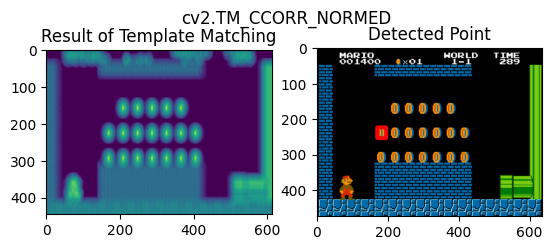

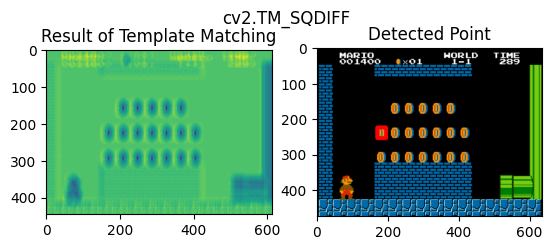

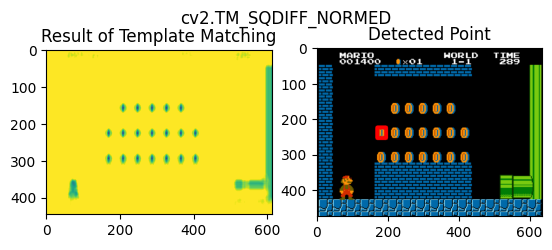

In [38]:
for m in methods:
    
    # Create a copy of the image
    mario_copy = mario.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(mario_copy,coin,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(mario_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(mario_copy)
    plt.title('Detected Point')
    
    plt.suptitle(m, y=0.75)
    
    plt.show()
    #plt.savefig(m + 'method.png')